<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/ML%2BDL_(Mobile_Prices_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('Dataset_for_ML.csv')
df.head()

,Unnamed: 0,Rating ?/5,Number of Ratings,Price in INR,Ram_size,Storage_size,Battery_size,Company_name
0,0,4.2,33561,5649,2.0,32.0,5000.0,12
1,1,4.2,77128,11999,4.0,64.0,5000.0,12
2,2,4.3,15175,6999,4.0,64.0,5000.0,12
3,3,4.2,22621,7749,4.0,64.0,5000.0,12
4,4,4.3,15175,6999,4.0,64.0,5000.0,12


In [2]:
df.drop(['Unnamed: 0','Company_name'],axis=1,inplace=True)

<Axes: >

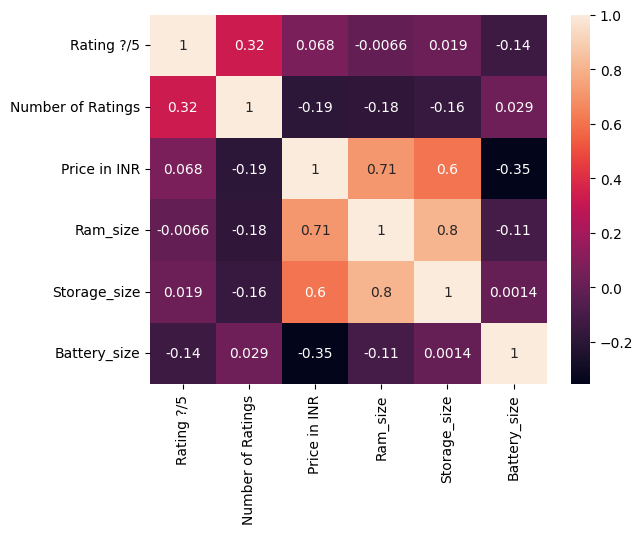

In [3]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [4]:
df1=df.copy()

In [5]:
x=df1.drop(['Price in INR'],axis=1)
y=df1.iloc[:,2:3]

In [6]:
x

,Rating ?/5,Number of Ratings,Ram_size,Storage_size,Battery_size
0,4.2,33561,2.0,32.0,5000.0
1,4.2,77128,4.0,64.0,5000.0
2,4.3,15175,4.0,64.0,5000.0
3,4.2,22621,4.0,64.0,5000.0
4,4.3,15175,4.0,64.0,5000.0
...,...,...,...,...,...
1015,4.3,25582,4.0,64.0,5000.0
1016,4.3,25582,4.0,64.0,5000.0
1017,4.3,25582,4.0,64.0,5000.0
1018,4.2,7117,8.0,128.0,4500.0


In [7]:
y

,Price in INR
0,5649
1,11999
2,6999
3,7749
4,6999
...,...
1015,14999
1016,14999
1017,14999
1018,18999


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True)

In [9]:
print('length of x_train',len(x_train),'length of y_train',len(y_train))
print('length of x_test',len(y_train),'length of y_test',len(y_test))

length of x_train 714 length of y_train 714
length of x_test 714 length of y_test 306


In [11]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_ss=ss.fit_transform(x_train)
y_train_ss=ss.fit_transform(y_train)
x_test_ss=ss.fit_transform(x_test)
y_test_ss=ss.fit_transform(y_test)

In [12]:
x_train_ss.std()

1.0

In [13]:
x_train_ss.mean()

-1.085717261504579e-15

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print('The model accuracy is:',lr.score(x_test,y_test))

The model accuracy is: 0.5903788201632258


In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_ss,y_train_ss)
print('the model accuracy of standard Data',lr.score(x_test_ss,y_test_ss))

the model accuracy of standard Data 0.5901843698151006


In [17]:
from sklearn.svm import SVR
svr=SVR(kernel='linear',degree=3)
svr.fit(x_train_ss,y_train_ss)
print('SVM model accuracy of StandardData:',svr.score(x_test_ss,y_test_ss))

SVM model accuracy of StandardData: 0.5770386230043557


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=3,max_leaf_nodes=7)
dt.fit(x_train,y_train)
print("Decision Tree Accuracy:",dt.score(x_test,y_test))

Decision Tree Accuracy: 0.629633577002368


In [19]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=3,max_leaf_nodes=7)
dt.fit(x_train_ss,y_train_ss)
print("Decision Tree Accuracy:",dt.score(x_test_ss,y_test_ss))

Decision Tree Accuracy: 0.6395343085336135


[Text(0.4230769230769231, 0.875, 'x[2] <= -0.242\nsquared_error = 1.0\nsamples = 714\nvalue = 0.0'),
 Text(0.15384615384615385, 0.625, 'x[4] <= -2.516\nsquared_error = 0.247\nsamples = 317\nvalue = -0.714'),
 Text(0.07692307692307693, 0.375, 'squared_error = 1.373\nsamples = 8\nvalue = 1.032'),
 Text(0.23076923076923078, 0.375, 'x[2] <= -0.999\nsquared_error = 0.136\nsamples = 309\nvalue = -0.76'),
 Text(0.15384615384615385, 0.125, 'squared_error = 0.066\nsamples = 118\nvalue = -1.014'),
 Text(0.3076923076923077, 0.125, 'squared_error = 0.115\nsamples = 191\nvalue = -0.602'),
 Text(0.6923076923076923, 0.625, 'x[4] <= 0.138\nsquared_error = 0.869\nsamples = 397\nvalue = 0.57'),
 Text(0.5384615384615384, 0.375, 'x[1] <= -0.385\nsquared_error = 0.693\nsamples = 143\nvalue = 1.212'),
 Text(0.46153846153846156, 0.125, 'squared_error = 0.595\nsamples = 90\nvalue = 1.45'),
 Text(0.6153846153846154, 0.125, 'squared_error = 0.6\nsamples = 53\nvalue = 0.807'),
 Text(0.8461538461538461, 0.375, 'x

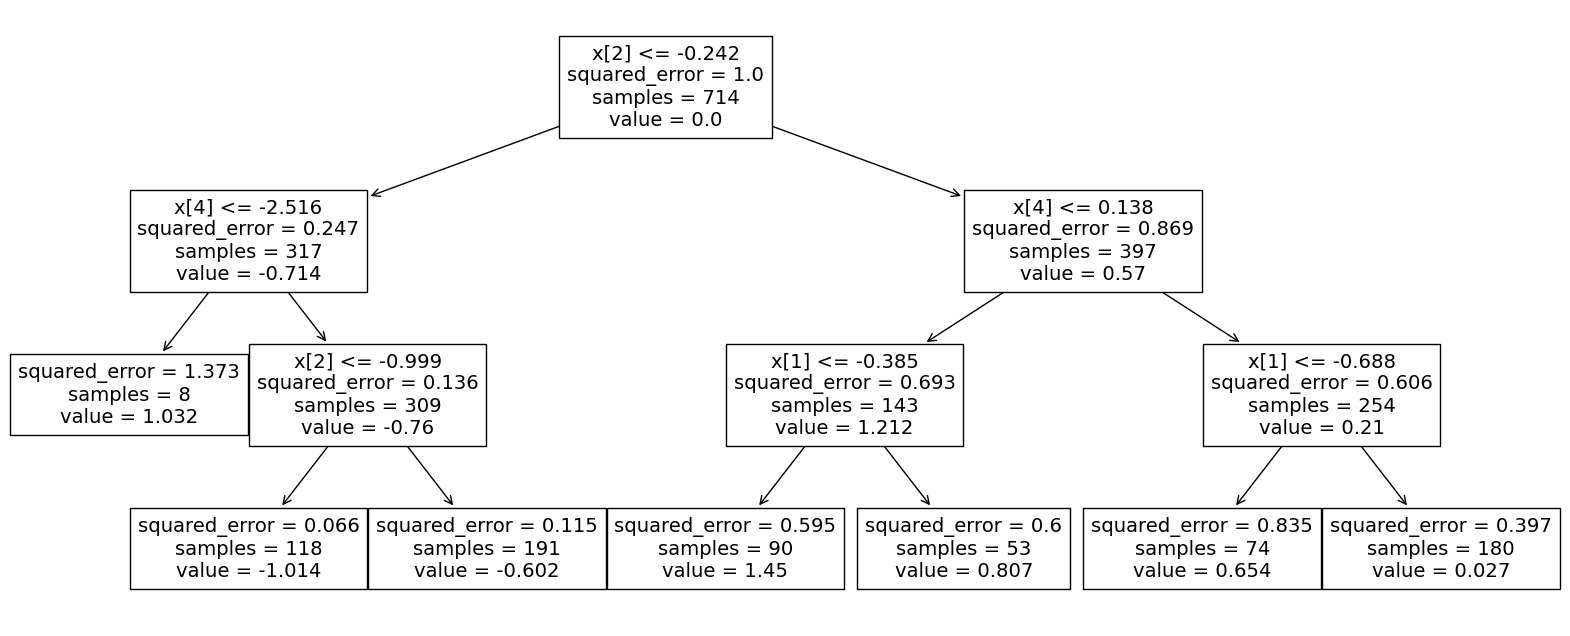

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
from sklearn import tree
tree.plot_tree(dt)

In [21]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=1,leaf_size=30)
knn.fit(x_train,y_train)
print('The accuracy of the KNN:',knn.score(x_test,y_test))

The accuracy of the KNN: 0.6295234697430621


In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(max_depth=10,max_leaf_nodes=9,verbose=0)
rfr.fit(x_train,y_train)
print('The accuracy of the random forest is:',rfr.score(x_test,y_test))

The accuracy of the random forest is: 0.6744800390346122


<ipython-input-23-9990f8414fd0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)


In [25]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(n_estimators=50,learning_rate=0.1)
abr.fit(x_train,y_train)
print('Accuracy for adaboost is',abr.score(x_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for adaboost is 0.6432627905143216


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=200,max_depth=3)
gbr.fit(x_train,y_train)
print('Accuracy of Gradient Boost is:',gbr.score(x_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Gradient Boost is: 0.7829761079068774


In [27]:
import xgboost
xg=xgboost.XGBRegressor(max_depth=10,laerning_rate=0.1,n_estimators=100)
xg.fit(x_train,y_train)
xg.score(x_test,y_test)

[13:12:05] WARNING: ../src/learner.cc:767: 
Parameters: { "laerning_rate" } are not used.



0.8493207457011268